In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax

from glob import glob

import cloudpickle

In [2]:
with open('/scratch/ch4407/lbc/checkpoints/h4_l128/checkpoint_50000.pkl', 'rb') as f:
    model, _, _, history = cloudpickle.load(f)

### Training performance

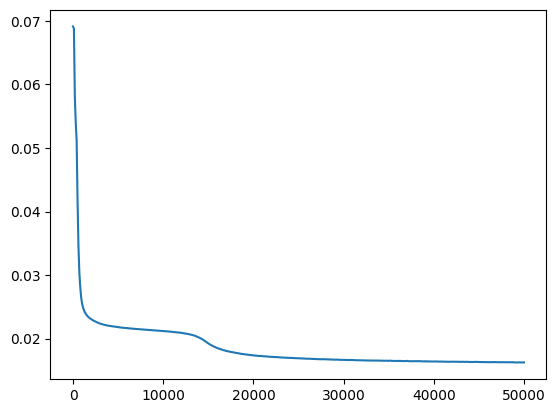

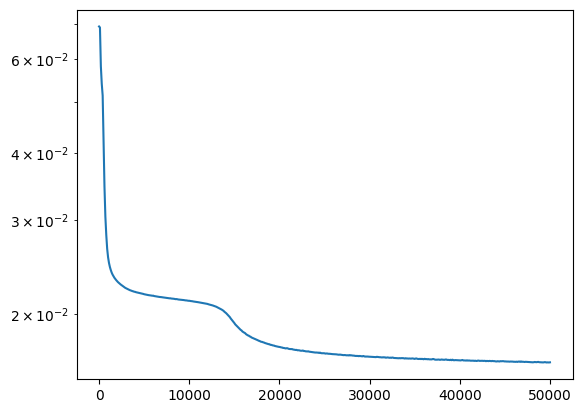

In [3]:
plt.plot(history['epoch'], history['loss'])
plt.show()

plt.plot(history['epoch'], history['loss'])
plt.yscale('log')
plt.show()

### Generated images

In [4]:
# Load images
filenames = sorted(glob("/scratch/ch4407/lbc/58540-processed/*.npy"))
print(len(filenames), "files found")
images = np.stack([np.load(fname) for fname in filenames]).reshape(-1, 1, 128, 128)
images = jax.numpy.array(images)
print("Input data shape:", images.shape)

25 files found
Input data shape: (25, 1, 128, 128)


In [5]:
def single_image_loss(x_hat, x):
    mse = ((x_hat - x) ** 2).mean()
    return mse

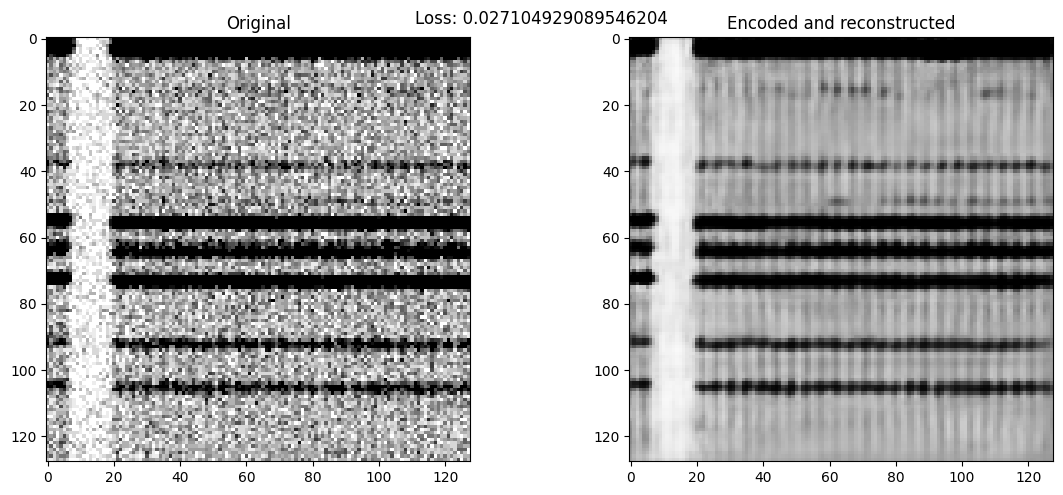

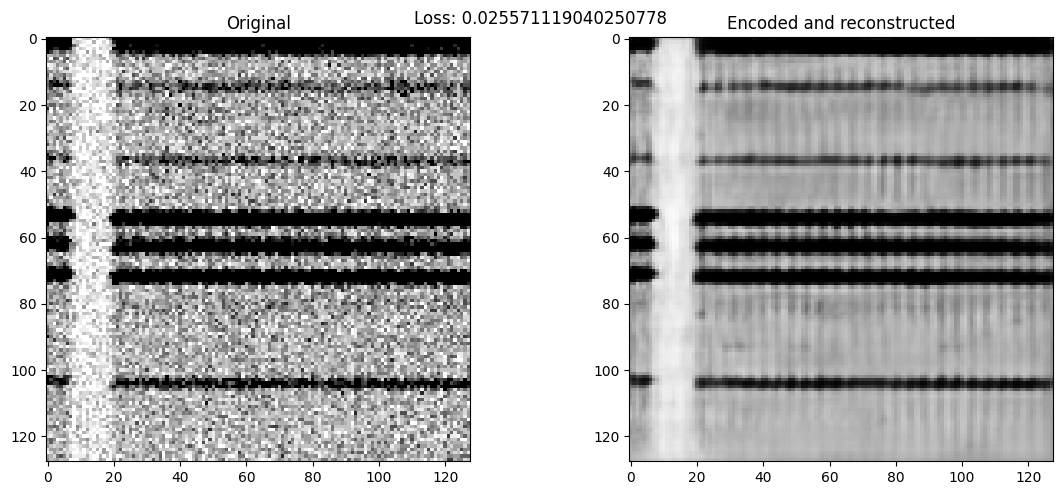

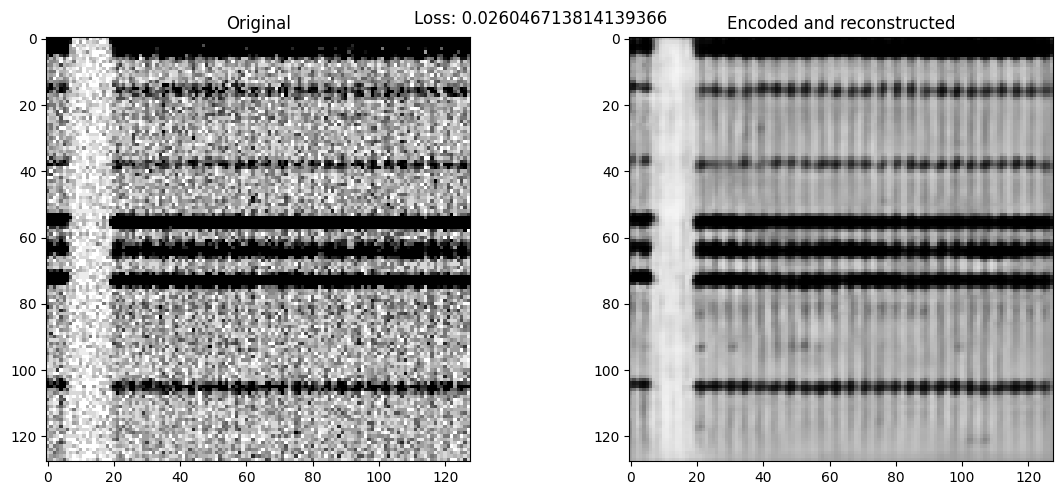

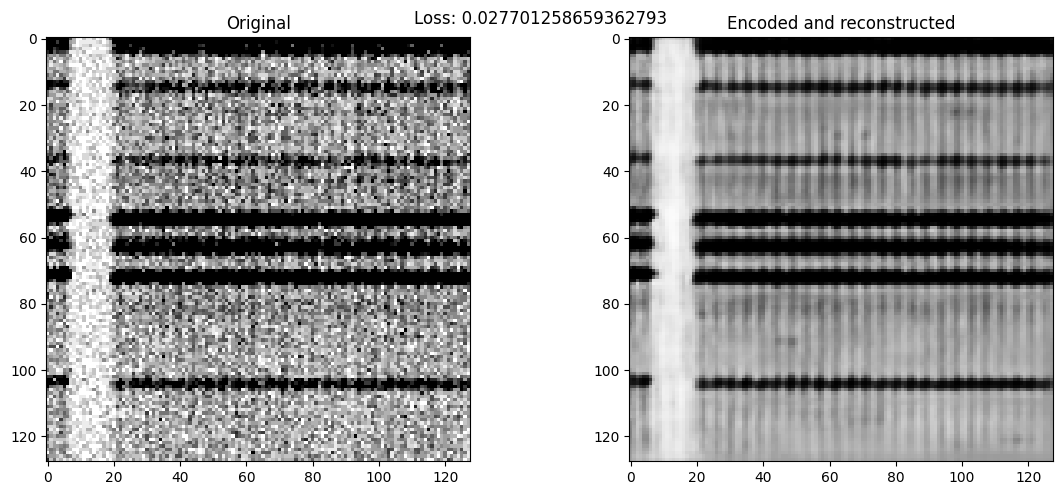

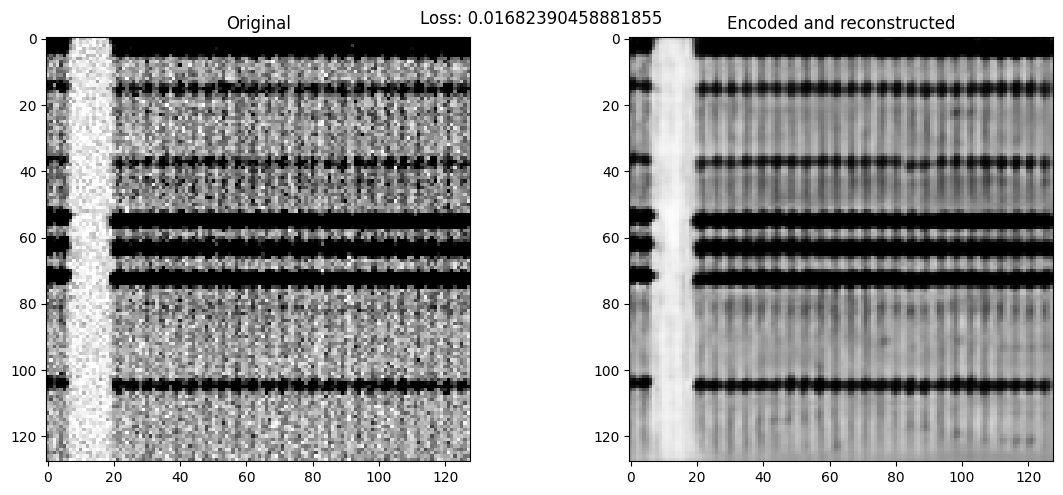

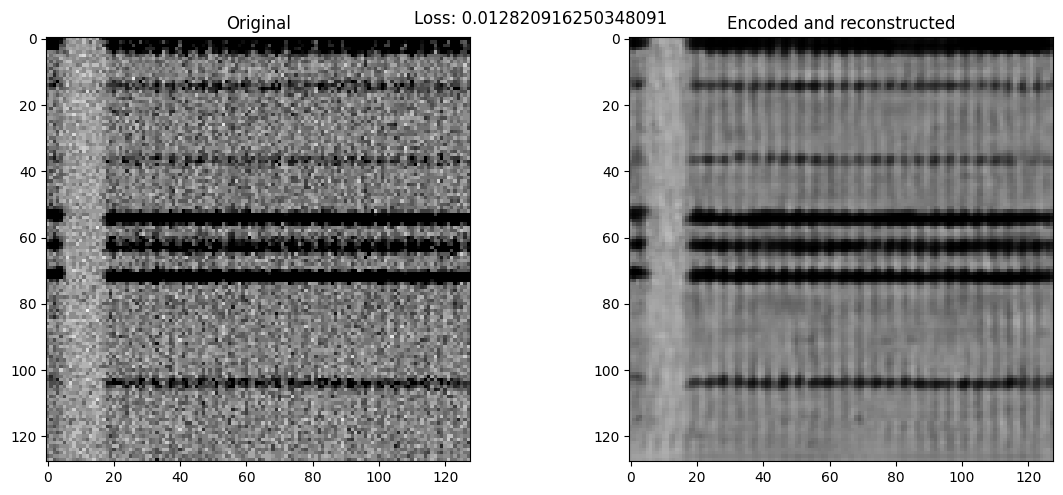

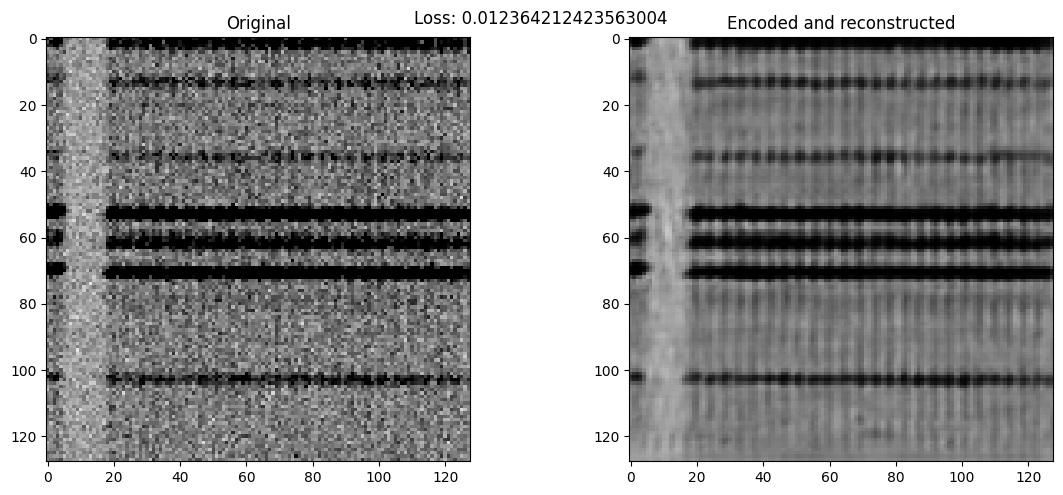

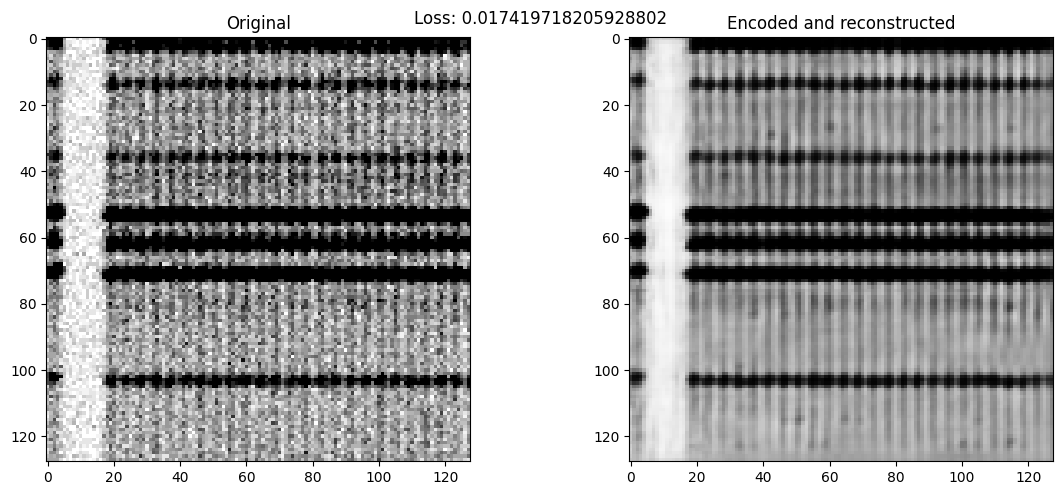

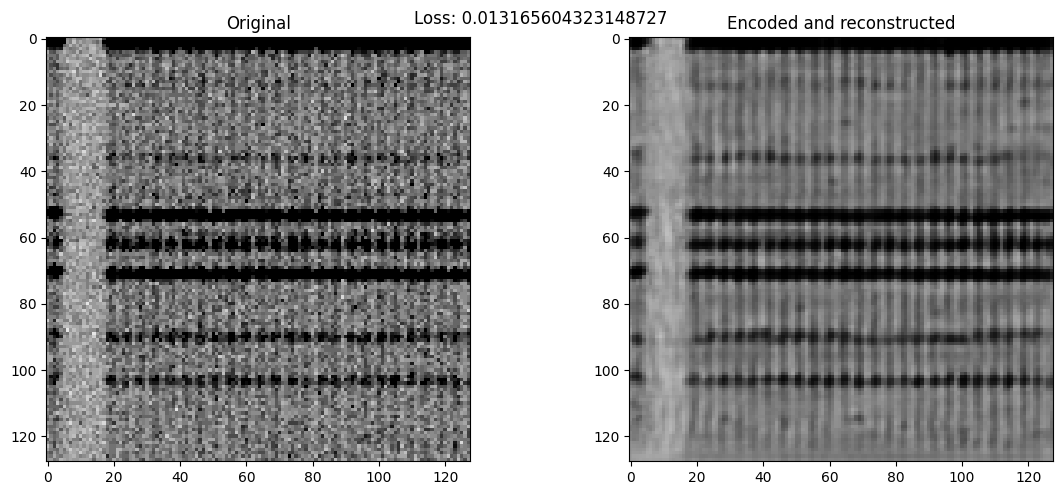

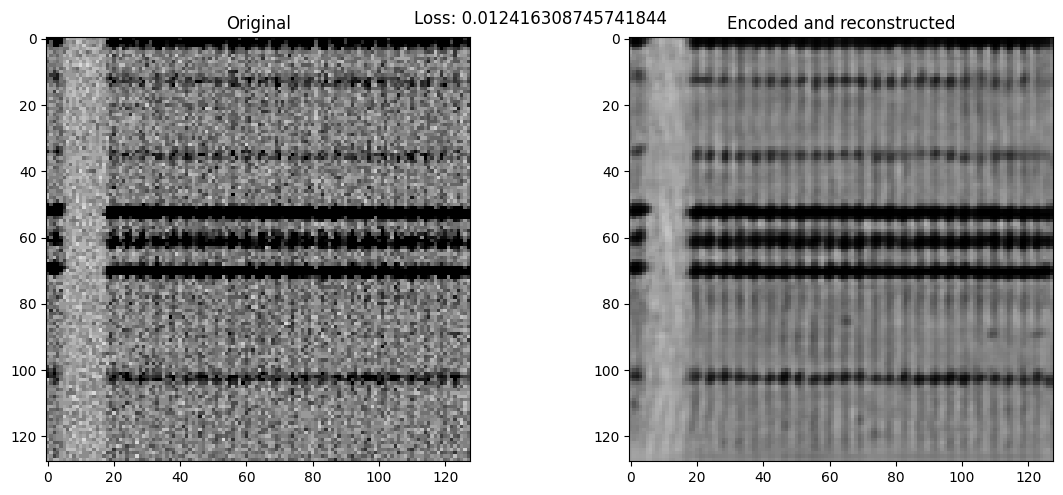

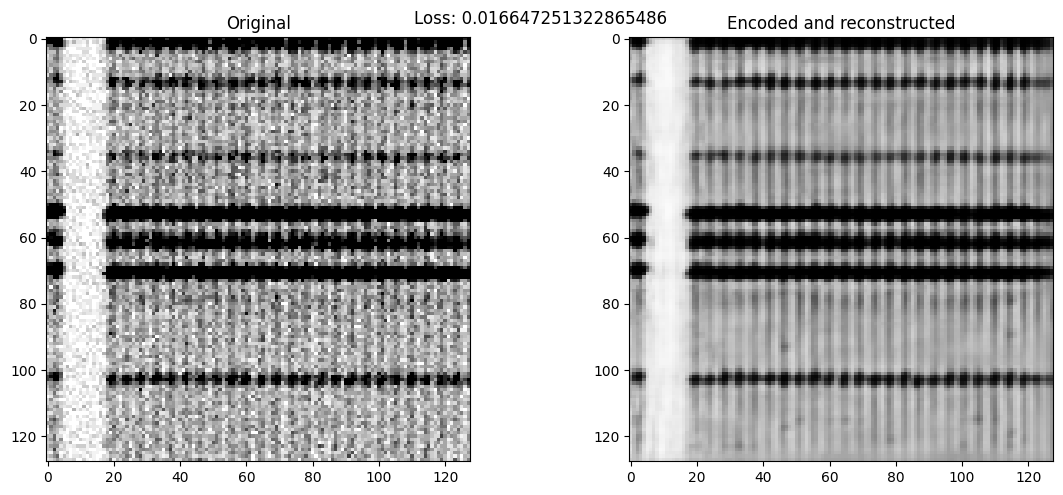

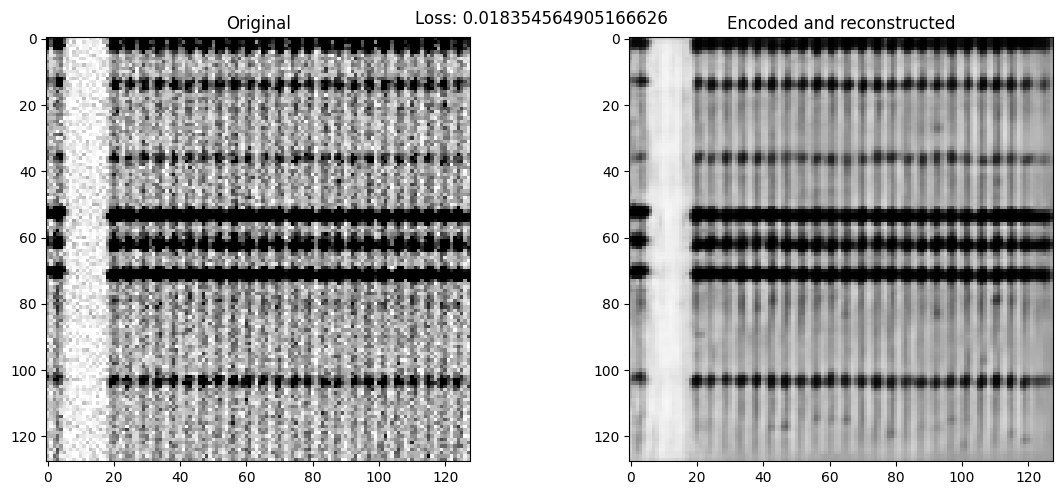

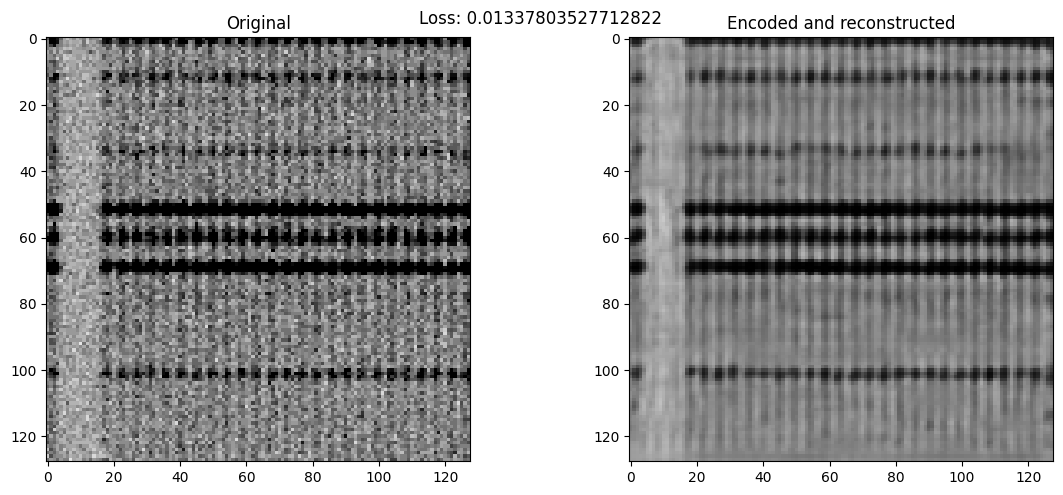

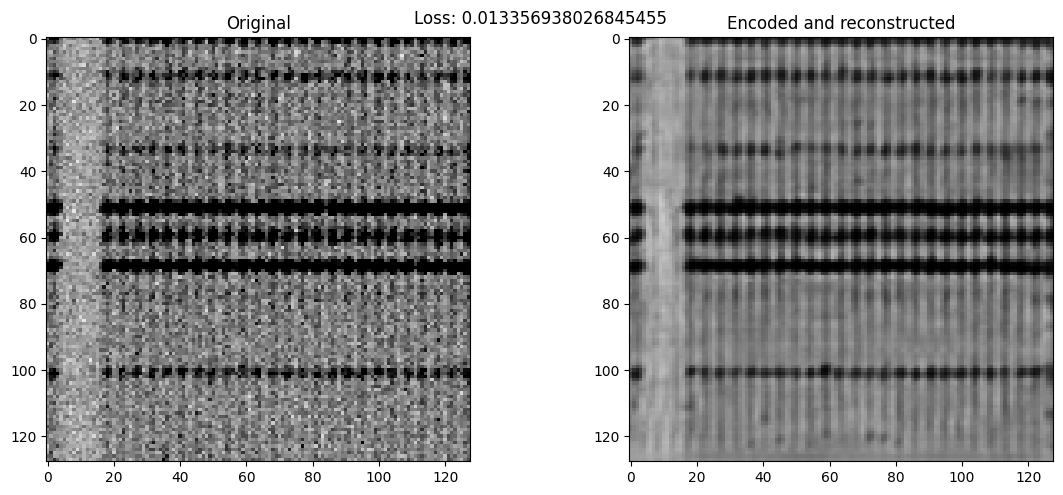

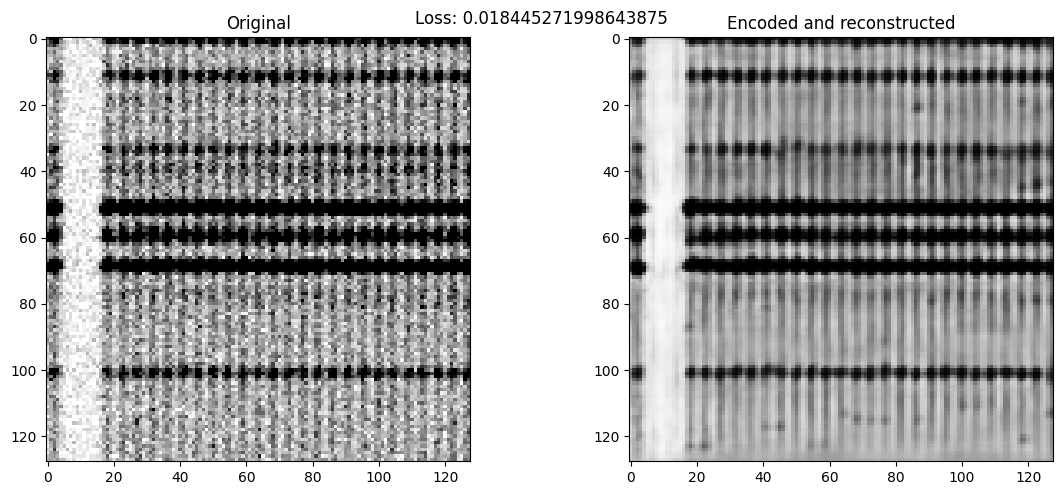

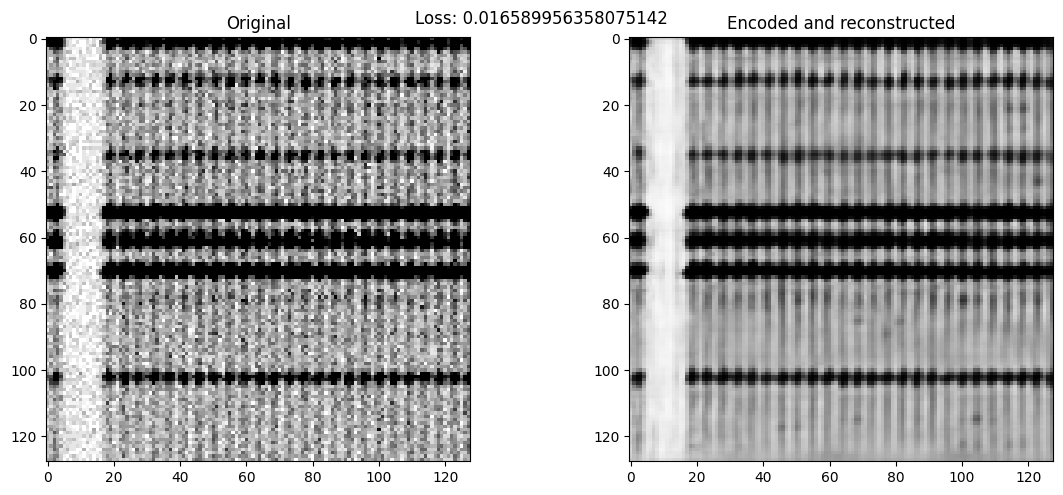

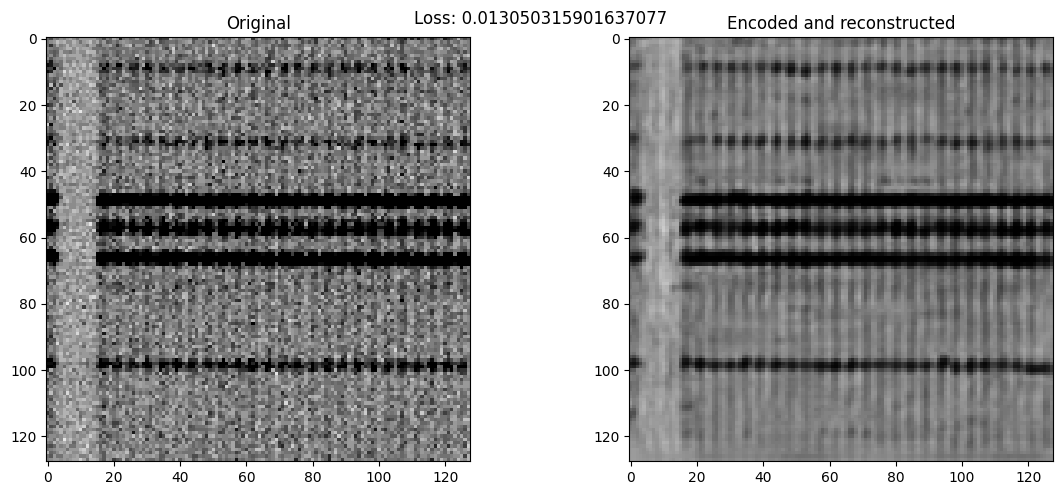

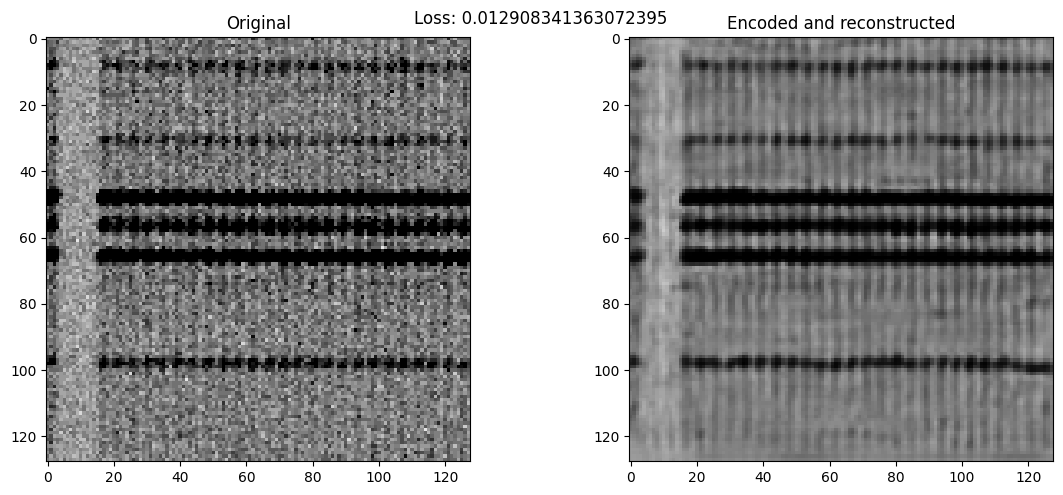

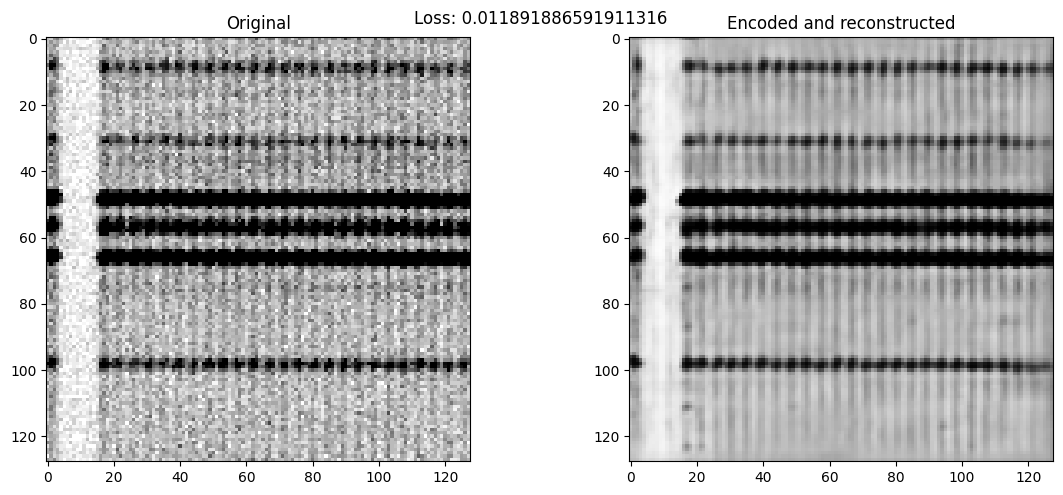

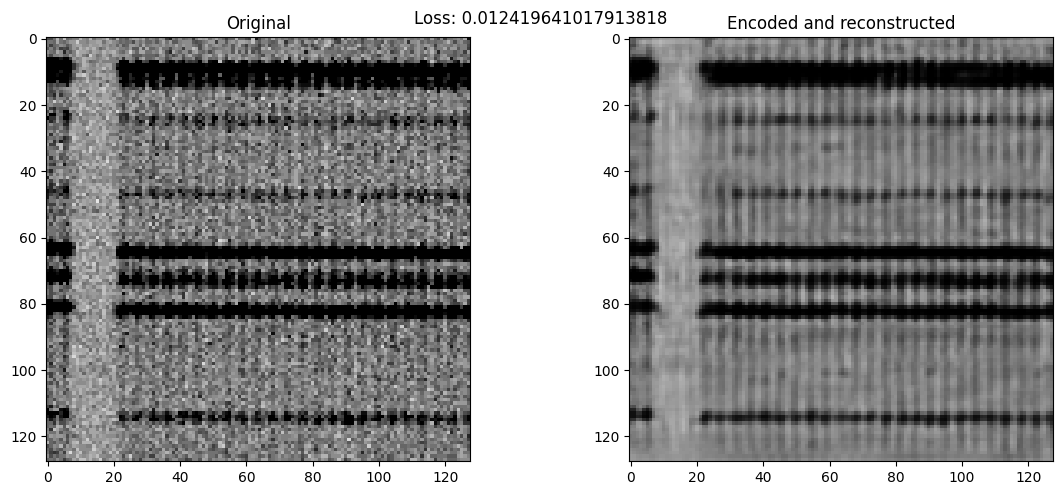

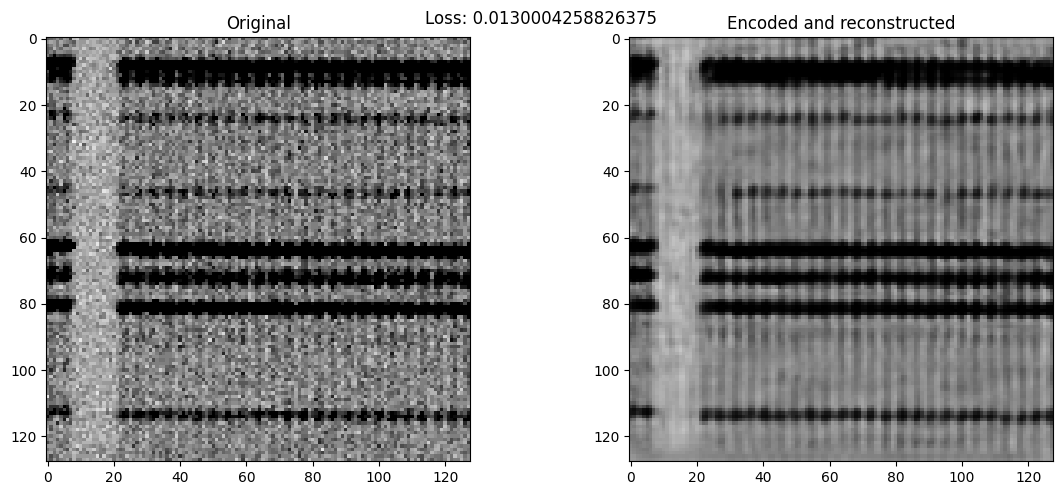

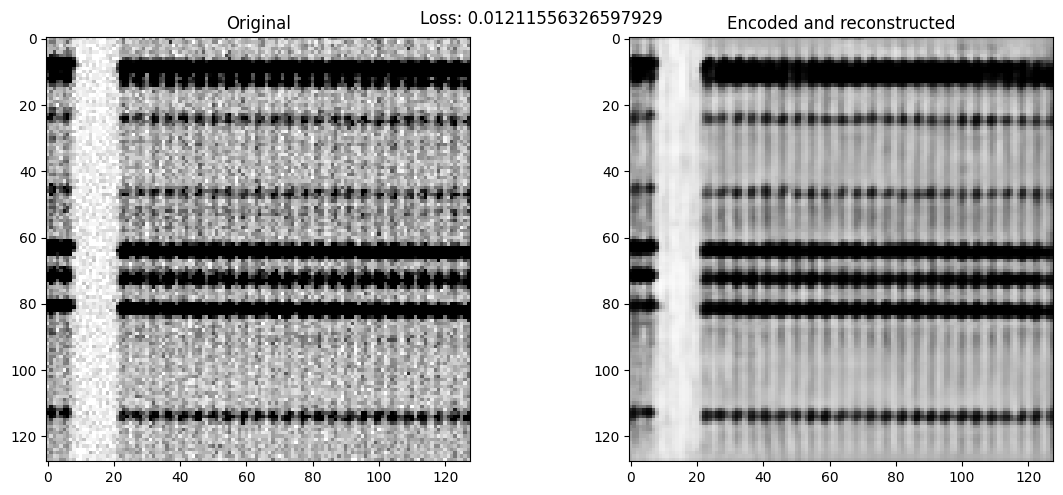

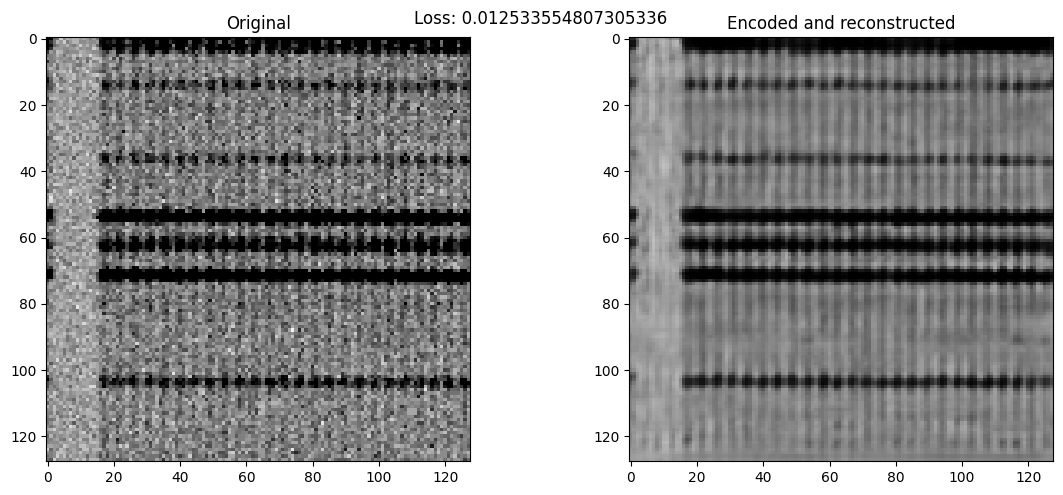

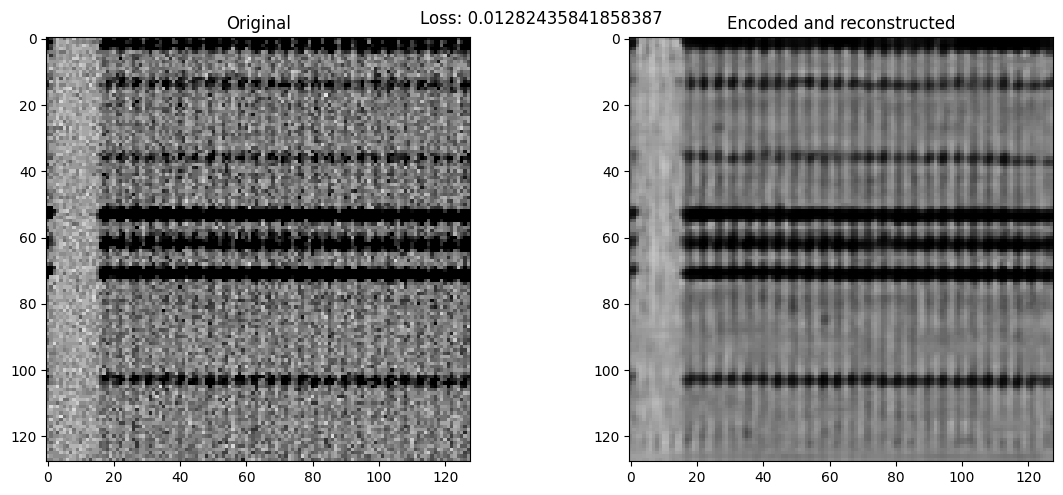

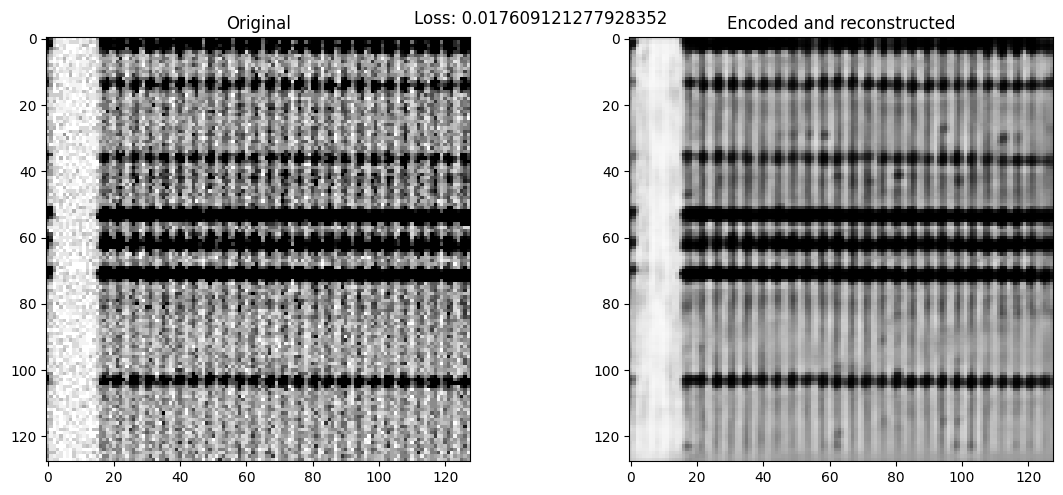

In [6]:
for img in images:
    x_hat = model(img)
    
    kw = dict(cmap='binary', vmin=0, vmax=1, interpolation='nearest')
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(img.squeeze(), **kw)
    axs[0].set_title('Original')
    axs[1].imshow(x_hat.squeeze(), **kw)
    axs[1].set_title('Encoded and reconstructed')
    fig.tight_layout()
    fig.suptitle(f'Loss: {single_image_loss(x_hat, img)}')
    plt.show()